NBA 2026 Free Agent Backup PG Analysis - Kush Havinal



In [ ]:
!pip install nba_api

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats, leaguedashplayerstats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import time

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [ ]:
from google.colab import files
uploaded = files.upload()

# used spotrac, free agent guards, pasted into excel, saved as a csv

# use the contracts csv provided in the google drive
csv_filename = list(uploaded.keys())[0]
df_contracts = pd.read_csv(csv_filename)

Saving guards_freeagents_2026.csv to guards_freeagents_2026.csv


In [ ]:
df_contracts.columns = df_contracts.columns.str.strip().str.lower().str.replace(" ", "_")

Salary Filtering

In [ ]:
# first step is to clean the salary column to be ready for filtering

print(df_contracts.iloc[:5])
df_contracts = df_contracts.rename(columns={'player_(96)': 'player'})
df_contracts = df_contracts.rename(columns={'prev_aav': 'salary'})

# function to clean salary strings into numbers
def clean_salary(salary_str):
    if pd.isna(salary_str):
        return np.nan

    # convert to string
    salary_str = str(salary_str).strip()

    # remove dollar signs and commas
    salary_str = salary_str.replace("$", "").replace(",", "")

    try:
      return float(salary_str)
    except:
      return np.nan

# apply the cleaning function
df_contracts['salary'] = df_contracts['salary'].apply(clean_salary)
print(df_contracts[['player', 'salary']].head(10))

       player_(96) pos   age  yoe prev_team     prev_aav             type
0       Trae Young  PG  27.2    7       ATL  $43,031,940  PLAYER / $49.0M
1      Zach LaVine  SG  30.8   11       SAC  $43,031,940  PLAYER / $49.0M
2     James Harden  SG  36.2   15       LAC  $40,750,000  PLAYER / $42.3M
3    C.J. McCollum  SG  34.2   13       WAS  $32,000,000       UFA / Bird
4  Anfernee Simons  SG  26.5    8       BOS  $25,000,000       UFA / Bird
                     player      salary
0                Trae Young  43031940.0
1               Zach LaVine  43031940.0
2              James Harden  40750000.0
3             C.J. McCollum  32000000.0
4           Anfernee Simons  25000000.0
5             Fred VanVleet  25000000.0
6              Terry Rozier  24064674.0
7  Kentavious Caldwell-Pope  22000000.0
8             Norman Powell  18000000.0
9             Collin Sexton  17737500.0


In [ ]:
# second step is to apply the 18M threshold to get a pool of players

CAP_ROOM = 18000000

print(f"Players with salary data: {len(df_contracts)}")
print(f"Salary range: ${df_contracts['salary'].min():,.0f} - ${df_contracts['salary'].max():,.0f}")

df_affordable = df_contracts[df_contracts['salary'] <= CAP_ROOM].copy()
print(f"Players affordable under ${CAP_ROOM:,.0f}: {len(df_affordable)}")

df_affordable.sort_values(by='salary', ascending=False, inplace=True)
print(df_affordable[['player', 'salary']])


Players with salary data: 96
Salary range: $0 - $43,031,940
Players affordable under $18,000,000: 88
               player      salary
8       Norman Powell  18000000.0
9       Collin Sexton  17737500.0
10  Bogdan Bogdanovic  17000000.0
11      Luguentz Dort  16500000.0
12      Kevin Huerter  16250000.0
..                ...         ...
91       K.J. Simpson         0.0
92    Elijah Harkless         0.0
93       Sidy Cissoko         0.0
94       Luke Travers         0.0
95      Alijah Martin         0.0

[88 rows x 2 columns]


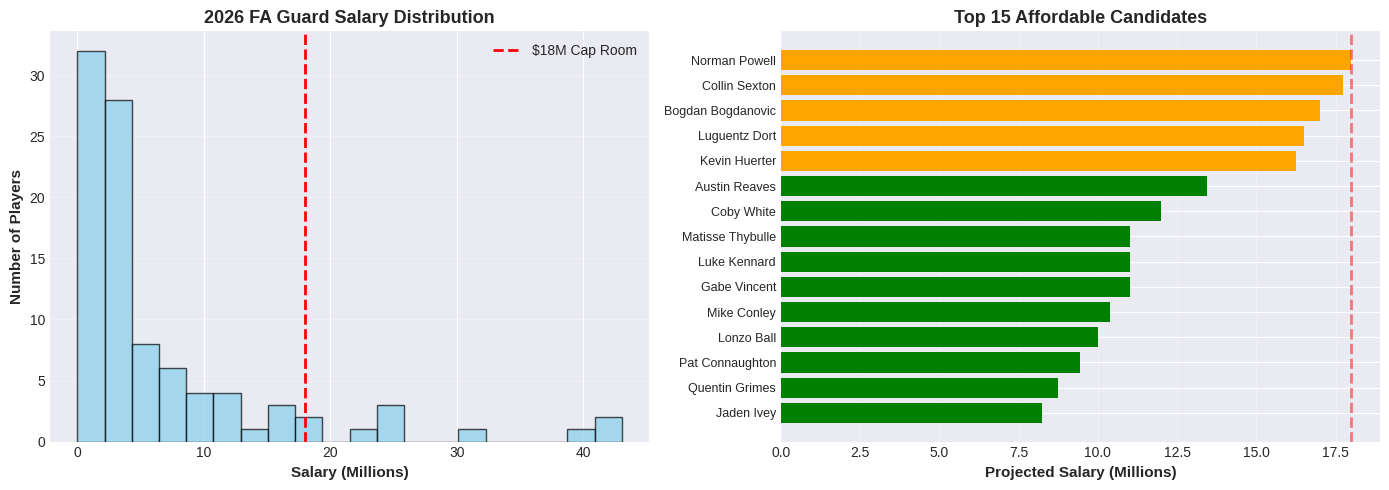

In [ ]:
# visuals to show salary distribution

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Histogram of all salaries with $18M line
axes[0].hist(df_contracts['salary'] / 1_000_000, bins=20,
             color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(x=18, color='red', linestyle='--', linewidth=2, label='$18M Cap Room')
axes[0].set_xlabel('Salary (Millions)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Number of Players', fontsize=11, fontweight='bold')
axes[0].set_title('2026 FA Guard Salary Distribution', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Bar chart of affordable players
top_affordable = df_affordable.head(15)

axes[1].barh(range(len(top_affordable)),
             top_affordable['salary'] / 1_000_000,
             color=['green' if x <= 15_000_000 else 'orange' for x in top_affordable['salary']])
axes[1].set_yticks(range(len(top_affordable)))
axes[1].set_yticklabels(top_affordable['player'], fontsize=9)
axes[1].set_xlabel('Projected Salary (Millions)', fontsize=11, fontweight='bold')
axes[1].set_title('Top 15 Affordable Candidates', fontsize=13, fontweight='bold')
axes[1].axvline(x=18, color='red', linestyle='--', linewidth=2, alpha=0.5)
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('salary_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# step 3 is to export the pool of affordable players

print(f"\nTotal affordable players: {len(df_affordable)}")
print(f"\nSalary breakdown:")
print(f"  • Under $10M: {len(df_affordable[df_affordable['salary'] < 10_000_000])}")
print(f"  • $10M - $15M: {len(df_affordable[(df_affordable['salary'] >= 10_000_000) & (df_affordable['salary'] < 15_000_000)])}")
print(f"  • $15M - $18M: {len(df_affordable[df_affordable['salary'] >= 15_000_000])}")

player_pool = df_affordable['player'].tolist()
print(player_pool[:5])


Total affordable players: 88

Salary breakdown:
  • Under $10M: 76
  • $10M - $15M: 7
  • $15M - $18M: 5
['Norman Powell', 'Collin Sexton', 'Bogdan Bogdanovic', 'Luguentz Dort', 'Kevin Huerter']


Applying NBA_API Data to Player Pool

In [ ]:
# goal: proficient in pick & roll and shooting off the dribble + also available from the nba_api

# pick and roll stats: PPP, POSS_PCT, TOV_POSS_PCT, FG_PCT
# shooting off the dribble: pull up 3%, pull up 2%, pull up volume, self creation rate

# step 1: match players pool to id's
from nba_api.stats.endpoints import synergyplaytypes, playerdashptshots

# map all players to player id's from our affordable players
all_nba_players = players.get_players()

player_name_to_id = {player['full_name']: player['id'] for player in all_nba_players}

# some player matches not working because of "." or "Jr" and rookies
name_corrections = {
    'Bogdan Bogdanovic': 'Bogdan Bogdanovic',
    'Egor Demin': 'Egor Demin',
    'Cameron Thomas': 'Cam Thomas',
    'Bruce Brown Jr.': 'Bruce Brown',
    'K.J. Simpson': 'KJ Simpson'
}

player_pool_with_ids = []
unmatched_players = []

for idx, row in df_affordable.iterrows():
    player_name = row['player']

    # check if name needs correction
    search_name = name_corrections.get(player_name, player_name)

    # exact match
    if search_name in player_name_to_id:
        player_id = player_name_to_id[search_name]
        player_pool_with_ids.append({
            'player_name': player_name,
            'player_id': player_id,
            'projected_salary': row['salary']
        })
    else:
        # fuzzy matching
        last_name = search_name.split()[-1]
        matches = [p for p in all_nba_players if last_name.lower() in p['full_name'].lower()]

        if len(matches) == 1:
            player_id = matches[0]['id']
            player_pool_with_ids.append({
                'player_name': player_name,
                'player_id': player_id,
                'projected_salary': row['salary']
            })
        elif len(matches) > 1:
            # multiple matches
            first_name = search_name.split()[0]
            better_matches = [p for p in matches if first_name.lower() in p['full_name'].lower()]
            if len(better_matches) == 1:
                player_id = better_matches[0]['id']
                player_pool_with_ids.append({
                    'player_name': player_name,
                    'player_id': player_id,
                    'projected_salary': row['salary']
                })
            else:
                unmatched_players.append(player_name)
        else:
            unmatched_players.append(player_name)

df_player_pool = pd.DataFrame(player_pool_with_ids)
print(f"\nMatched {len(df_player_pool)} / {len(df_affordable)} players")

# rookie egor demin not available from stats endpoint
if unmatched_players:
    print(f"Unmatched players ({len(unmatched_players)}):")
    for p in unmatched_players:
        print(f"  - {p}")

print(f"\nPlayer Pool:")
print(df_player_pool[['player_name', 'player_id', 'projected_salary']].head(20))


Matched 87 / 88 players
Unmatched players (1):
  - Egor Demin

Player Pool:
           player_name  player_id  projected_salary
0        Norman Powell    1626181        18000000.0
1        Collin Sexton    1629012        17737500.0
2    Bogdan Bogdanovic     202711        17000000.0
3        Luguentz Dort    1629652        16500000.0
4        Kevin Huerter    1628989        16250000.0
5        Austin Reaves    1630559        13456968.0
6           Coby White    1629632        12000000.0
7     Matisse Thybulle    1629680        11025000.0
8         Luke Kennard    1628379        11000000.0
9         Gabe Vincent    1629216        11000000.0
10         Mike Conley     201144        10375000.0
11          Lonzo Ball    1628366        10000000.0
12     Pat Connaughton    1626192         9423869.0
13      Quentin Grimes    1629656         8741209.0
14          Jaden Ivey    1631093         8237771.0
15  Bennedict Mathurin    1631097         7484043.0
16          Tyus Jones    1626145      

In [ ]:
# step 2: pull in data for pick and roll for the df_player_pool

try:
  synergy = synergyplaytypes.SynergyPlayTypes(
      league_id='00',
      per_mode_simple='PerGame',
      player_or_team_abbreviation='P',
      season_type_all_star='Regular Season',
      season="2024-25",
      play_type_nullable="PRBallHandler",
      type_grouping_nullable='offensive'
  )

  df_synergy_full = synergy.get_data_frames()[0]
  print(f"pulled in synergy data: {len(df_synergy_full)}")

  # filter for player pool
  df_pnr_stats = df_synergy_full[df_synergy_full['PLAYER_ID'].isin(df_player_pool['player_id'])].copy()

  # relevant columns
  pnr_columns = ['PLAYER_ID', 'PLAYER_NAME', 'GP', 'POSS_PCT', 'PPP',
                   'FG_PCT', 'TOV_POSS_PCT', 'POSS', 'PTS', 'FGM', 'FGA']

  df_pnr_stats = df_pnr_stats[pnr_columns]

  # rename column names
  df_pnr_stats.columns = ['player_id', 'player_name', 'pnr_gp', 'pnr_poss_pct',
                            'pnr_ppp', 'pnr_fg_pct', 'pnr_tov_pct', 'pnr_poss_pg',
                            'pnr_pts_pg', 'pnr_fgm_pg', 'pnr_fga_pg']

  print(f"PnR data for {len(df_pnr_stats)} / {len(df_player_pool)} players")
except Exception as e:
  print(f"Error pulling in data: {e}")

# since some players are not found -> can deduce they don't have high pnr skills -> can filter them out after

pulled in synergy data: 338
PnR data for 61 / 87 players


In [ ]:
# step 3: pull up shooting splits data for each player (off the dribble)

pull_up_shots_data = []

# loop through each player and pull their shots data
for idx, row in df_player_pool.iterrows():
  player_id = row['player_id']
  player_name = row['player_name']

  player_pull_up_shot_data = {
      'player_id': player_id,
      'player_name': player_name
  }

  try:

    pull_up_shots = playerdashptshots.PlayerDashPtShots(
        player_id=player_id,
        team_id=0,
        season='2024-25',
        per_mode_simple = 'PerGame'
    )

    pull_up_shots_dfs = pull_up_shots.get_data_frames()

    # shot types
    if len(pull_up_shots_dfs) > 1 and not pull_up_shots_dfs[1].empty:
      df_shot_type = pull_up_shots_dfs[1]

      # pull ups
      pull_up_row = df_shot_type[df_shot_type['SHOT_TYPE'] == 'Pull Ups']
      if not pull_up_row.empty:
        player_pull_up_shot_data['pullup_fg3a_freq'] = pull_up_row['FG3A_FREQUENCY'].values[0]
        player_pull_up_shot_data['pullup_fgm_pg'] = pull_up_row['FGM'].values[0]
        player_pull_up_shot_data['pullup_fga_pg'] = pull_up_row['FGA'].values[0]
        player_pull_up_shot_data['pullup_fg_pct'] = pull_up_row['FG_PCT'].values[0]
        player_pull_up_shot_data['pullup_3p_pct'] = pull_up_row['FG3_PCT'].values[0]
        player_pull_up_shot_data['pullup_2p_pct'] = pull_up_row['FG2_PCT'].values[0]
        player_pull_up_shot_data['pullup_3pa_pg'] = pull_up_row['FG3A'].values[0]
        player_pull_up_shot_data['pullup_2pa_pg'] = pull_up_row['FG2A'].values[0]

    # dribble range

    if len(pull_up_shots_dfs) > 3 and not pull_up_shots_dfs[3].empty:
      df_drib_range = pull_up_shots_dfs[3]

      # total fga from all ranges
      total_fga = df_drib_range['FGA'].sum()

      # high dribble range
      high_drib_row = df_drib_range[df_drib_range['DRIBBLE_RANGE'].isin(['3-6 Dribbles', '7+ Dribbles'])]
      high_drib_fga = high_drib_row['FGA'].sum()

      # self creation rate: % of how many high dribbles a player uses before a shot
      if total_fga > 0:
        player_pull_up_shot_data['self_creation_rate'] = high_drib_fga / total_fga
      else:
        player_pull_up_shot_data['self_creation_rate'] = 0.0

      player_pull_up_shot_data['high_dribble_fga_pg'] = high_drib_fga
      player_pull_up_shot_data['total_fga_pg'] = total_fga

    pull_up_shots_data.append(player_pull_up_shot_data)
  except Exception as e:
    print(f"Error pulling in data for {player_name}: {e}")
    pull_up_shots_data.append({
        'player_id': player_id,
        'player_name': player_name
    })

  # rate limiting
  time.sleep(1)

df_pull_up_shots = pd.DataFrame(pull_up_shots_data)

print(f"Successfully pulled PT Shots data for {len(df_pull_up_shots)} players")
print("\nPT Shots Preview:")
display_cols = ['player_name', 'pullup_fg3a_freq', 'pullup_3p_pct', 'pullup_2p_pct', 'self_creation_rate']
available_display = [col for col in display_cols if col in df_pull_up_shots.columns]
print(df_pull_up_shots[available_display].head(10))

Successfully pulled PT Shots data for 87 players

PT Shots Preview:
         player_name  pullup_fg3a_freq  pullup_3p_pct  pullup_2p_pct  \
0      Norman Powell             0.199          0.378          0.394   
1      Collin Sexton             0.161          0.386          0.433   
2  Bogdan Bogdanovic               NaN            NaN            NaN   
3      Luguentz Dort             0.096          0.351          0.418   
4      Kevin Huerter             0.152          0.380          0.472   
5      Austin Reaves             0.232          0.349          0.439   
6         Coby White             0.222          0.345          0.443   
7   Matisse Thybulle             0.068          0.500          0.000   
8       Luke Kennard             0.149          0.349          0.480   
9       Gabe Vincent             0.186          0.295          0.525   

   self_creation_rate  
0            0.405714  
1            0.558140  
2                 NaN  
3            0.161677  
4            0.1371

In [ ]:
# step 4: merge pnr data + pull up shots data

df_combined = df_player_pool.copy()

# merge pnr stats
if not df_pnr_stats.empty:
  df_combined = df_combined.merge(df_pnr_stats, on='player_id', how='left')
  print(f"Successfully merged PnR data for {len(df_combined)} players")

# merge pull up shots
if not df_pull_up_shots.empty:
  df_combined = df_combined.merge(df_pull_up_shots, on='player_id', how='left')
  print(f"Successfully merged PT Shots data for {len(df_combined)} players")

# after merges fix the names of columns
df_combined = df_combined.drop(columns=['player_name_y'])
df_combined = df_combined.rename(columns={'player_name_x': 'player_name'})

# drop duplicates keep first occurence
df_combined = df_combined.loc[:, ~df_combined.columns.duplicated()]

print(f"Combined dataset of players: {len(df_combined)} before filtering")

# the players that do not have any pnr stats will be filtered out, since we are assuming they will not fit the critera of a "proficient at the pick and roll category"

players_before = len(df_combined)
df_combined = df_combined[df_combined['pnr_ppp'].notna()].copy()
players_after = len(df_combined)

print(f"Players with PnR data: {players_after} / {players_before}")
print(f"Filtered out: {players_before - players_after} players without meaningful PnR usage")
print(f"\nFinal candidate pool: {players_after} players")

print(f"\nColumns: {df_combined.columns.tolist()}")

Successfully merged PnR data for 93 players
Successfully merged PT Shots data for 95 players
Combined dataset of players: 95 before filtering
Players with PnR data: 64 / 95
Filtered out: 31 players without meaningful PnR usage

Final candidate pool: 64 players

Columns: ['player_name', 'player_id', 'projected_salary', 'pnr_gp', 'pnr_poss_pct', 'pnr_ppp', 'pnr_fg_pct', 'pnr_tov_pct', 'pnr_poss_pg', 'pnr_pts_pg', 'pnr_fgm_pg', 'pnr_fga_pg', 'pullup_fg3a_freq', 'pullup_fgm_pg', 'pullup_fga_pg', 'pullup_fg_pct', 'pullup_3p_pct', 'pullup_2p_pct', 'pullup_3pa_pg', 'pullup_2pa_pg', 'self_creation_rate', 'high_dribble_fga_pg', 'total_fga_pg']


Last Factors Before Final Consideration

In [ ]:
# we also want to there to a threshold of mins played + gp played + age as factors that go into choosing our player

# age -> this paired up with the contract will show us young, prime, or declining age players
# gp played -> filter for players who have good stats but played 5 games
# mins played -> filter by minutes to get difference between starter vs bench

# had some duplicate id's issues, filtering them here:
duplicate_ids = df_combined[df_combined.duplicated(subset=['player_id'], keep=False)]

duplicate_counts = df_combined['player_id'].value_counts()
duplicate_counts = duplicate_counts[duplicate_counts > 1]
print(f"\n\nDuplicate frequency:")
print(duplicate_counts)
print(f"Before: {len(df_combined)} rows, {df_combined['player_id'].nunique()} unique players")

# keep first occurrence of each player_id
df_combined = df_combined.drop_duplicates(subset=['player_id'], keep='first')
print(f"After: {len(df_combined)} rows, {df_combined['player_id'].nunique()} unique players")


# first get league stats for the 2024-25 season

try:

  season_stats = leaguedashplayerstats.LeagueDashPlayerStats(
      season='2024-25',
      per_mode_detailed='PerGame',
      season_type_all_star='Regular Season'
  )

  df_season_stats = season_stats.get_data_frames()[0]
  print(f"Pulled in season stats: {len(df_season_stats)}")

  # filter for player pool
  df_season_filtered = df_season_stats[df_season_stats['PLAYER_ID'].isin(df_combined['player_id'])].copy()
  print(f"Filtered for {len(df_season_filtered)} / {len(df_combined)} players")

  df_basic_stats = df_season_filtered[['PLAYER_ID', 'PLAYER_NAME', 'AGE', 'GP', 'MIN']]
  df_basic_stats.columns = ['player_id', 'player_name', 'age', 'gp', 'mins']

  print(f"Basic stats for {len(df_basic_stats)} / {len(df_combined)} players")
  print(df_basic_stats.head(10))

except Exception as e:
  print(f"Error pulling in data: {e}")



Duplicate frequency:
player_id
1642347    4
203935     2
1628989    2
1626156    2
1629645    2
1628971    2
1629656    2
Name: count, dtype: int64
Before: 64 rows, 55 unique players
After: 55 rows, 55 unique players
Pulled in season stats: 569
Filtered for 55 / 55 players
Basic stats for 55 / 55 players
    player_id         player_name   age  gp  mins
4     1628988       Aaron Holiday  28.0  62  12.8
21    1629599         Amir Coffey  28.0  72  24.3
32    1641810      Antonio Reeves  24.0  44  15.0
36    1630559       Austin Reaves  27.0  73  34.9
37    1630245         Ayo Dosunmu  25.0  46  30.3
42    1631097  Bennedict Mathurin  23.0  72  29.9
45    1631104        Blake Wesley  22.0  58  11.8
50    1630538        Bones Hyland  24.0  24   9.9
51     203078        Bradley Beal  32.0  53  32.1
58    1630314    Brandon Williams  25.0  33  14.8


In [ ]:
# next merge basic stats into combined df

if not df_basic_stats.empty:
  cols_to_drop = [col for col in df_combined.columns if col.startswith(('age', 'gp', 'mins')) and col not in ['pnr_gp']]
  df_combined = df_combined.drop(columns=cols_to_drop, errors='ignore')

  df_combined = df_combined.merge(
      df_basic_stats[['player_id', 'age', 'gp', 'mins']],
      on='player_id',
      how='left',
      suffixes=('', '_y_new')
  )
  print(f"Successfully merged basic stats for {len(df_combined)} players")

print(df_combined.head(10))
print(f"Columns of combined df: {df_combined.columns.tolist()}")

Successfully merged basic stats for 55 players
     player_name  player_id  projected_salary  pnr_gp  pnr_poss_pct  pnr_ppp  \
0  Norman Powell    1626181        18000000.0    60.0         0.188    1.050   
1  Collin Sexton    1629012        17737500.0    63.0         0.274    0.932   
2  Luguentz Dort    1629652        16500000.0    71.0         0.039    0.885   
3  Kevin Huerter    1628989        16250000.0    26.0         0.114    0.789   
4  Austin Reaves    1630559        13456968.0    73.0         0.301    1.002   
5     Coby White    1629632        12000000.0    74.0         0.286    0.912   
6   Luke Kennard    1628379        11000000.0    65.0         0.123    0.797   
7   Gabe Vincent    1629216        11000000.0    72.0         0.159    0.707   
8    Mike Conley     201144        10375000.0    71.0         0.292    0.870   
9     Lonzo Ball    1628366        10000000.0    35.0         0.183    0.963   

   pnr_fg_pct  pnr_tov_pct  pnr_poss_pg  pnr_pts_pg  ...  pullup_3p_pct 

Player Score Recommendation + Ranking

Now that we have a dataframe with relevant stats, to recommend a player we must build a scoring engine.

Scoring engine breakdown: 40 pts for pnr, 40 points for pull up shots, 20 points for contract + age.

In [ ]:
# needed for data analysis

scoring_metrics = {
    'PnR Metrics': ['pnr_ppp', 'pnr_poss_pct', 'pnr_tov_pct', 'pnr_fg_pct'],
    'Pull-up Shot Metrics': ['pullup_fg3a_freq', 'pullup_3p_pct', 'pullup_2p_pct', 'self_creation_rate'],
    'Contract & Age/Minutes': ['projected_salary', 'age', 'mins']
}

print("DESCRIPTIVE STATISTICS FOR SCORING METRICS")

for category, metrics_list in scoring_metrics.items():
    print(f"\n--- {category} ---")
    for metric in metrics_list:
        if metric in df_combined.columns:
            print(f"\nMetric: {metric}")
            stats = df_combined[metric].dropna().describe()
            print(f"  Min: {stats['min']:.3f}")
            print(f"  Max: {stats['max']:.3f}")
            print(f"  Mean: {stats['mean']:.3f}")
            print(f"  Median: {df_combined[metric].median():.3f}")
            print(f"  Std Dev: {stats['std']:.3f}")
        else:
            print(f"  Warning: Metric '{metric}' not found in DataFrame.")

DESCRIPTIVE STATISTICS FOR SCORING METRICS

--- PnR Metrics ---

Metric: pnr_ppp
  Min: 0.273
  Max: 1.390
  Mean: 0.870
  Median: 0.870
  Std Dev: 0.192

Metric: pnr_poss_pct
  Min: 0.026
  Max: 0.415
  Mean: 0.200
  Median: 0.202
  Std Dev: 0.102

Metric: pnr_tov_pct
  Min: 0.000
  Max: 0.404
  Mean: 0.161
  Median: 0.158
  Std Dev: 0.068

Metric: pnr_fg_pct
  Min: 0.100
  Max: 0.606
  Mean: 0.419
  Median: 0.419
  Std Dev: 0.090

--- Pull-up Shot Metrics ---

Metric: pullup_fg3a_freq
  Min: 0.014
  Max: 0.466
  Mean: 0.147
  Median: 0.141
  Std Dev: 0.089

Metric: pullup_3p_pct
  Min: 0.143
  Max: 0.583
  Mean: 0.328
  Median: 0.338
  Std Dev: 0.086

Metric: pullup_2p_pct
  Min: 0.000
  Max: 1.000
  Mean: 0.409
  Median: 0.424
  Std Dev: 0.138

Metric: self_creation_rate
  Min: 0.024
  Max: 0.681
  Mean: 0.335
  Median: 0.327
  Std Dev: 0.149

--- Contract & Age/Minutes ---

Metric: projected_salary
  Min: 0.000
  Max: 18000000.000
  Mean: 5460317.400
  Median: 3634153.000
  Std Dev

**PNR Scoring Breakdown**
- points per possession is given the most weight 15/40 as it captures a player's ability to generate points from the pick and roll
- possession percentage is given 10/40 to how frequency of usage as a ball handler in pick and roll
- turnover percentage is given 10/40 where low turnover rate is favorable to show high decision making skills
- fg pct is given 5/40 because this shows the shot-making ability out of pick and roll for that one player

**Off the Dribble Scoring Breakdown**
- pull up 3% is given 16/40 as this skill is very valuable as a guard who can knockdown the 3 off the dribble is hard to defend against
- pull up 2% is given 8/40 as this shows their ability to work in the midrange and hit floaters
- fga frequency is given 8/40 as this shows attempts per game and we need players with a decent amount of attempts to trust their skill
- self creation is given 8/40 as this is shots after 3+ dribbles that separates shot creators from catch and shoot guards

**Contract and Age Scoring Breakdown**
- salary is given 10/20 points as even though we have 18 M in cap space, finding players who are below budget can help give roster flexibility
- age is given 10/20 points because players in their prime can get better while veterans might be in the decline phase, so it's important to get players who will be productive for a couple years

In [ ]:
# pick and roll scoring
def score_pnr_ppp(ppp):
    "PPP out of 15 points"
    if pd.isna(ppp):
        return 0
    if ppp >= 1.00:
        return 15  # Elite
    elif ppp >= 0.90:
        return 12  # Above average
    elif ppp >= 0.85:
        return 9   # Average
    else:
        return 6   # Below average

def score_pnr_poss_pct(poss_pct):
    "POSS_PCT out of 10 points"
    if pd.isna(poss_pct):
        return 0
    if poss_pct >= 0.35:
        return 10  # High usage
    elif poss_pct >= 0.25:
        return 8   # Moderate usage
    elif poss_pct >= 0.15:
        return 5   # Low-moderate usage
    else:
        return 2   # Minimal usage

def score_pnr_tov_pct(tov_pct):
    "TOV_POSS_PCT out of 10 points"
    if pd.isna(tov_pct):
        return 0
    if tov_pct < 0.10:
        return 10  # Elite protection
    elif tov_pct < 0.13:
        return 8   # Good protection
    elif tov_pct < 0.15:
        return 6   # Average protection
    else:
        return 3   # Poor protection

def score_pnr_fg_pct(fg_pct):
    "FG_PCT out of 5 points"
    if pd.isna(fg_pct):
        return 0
    if fg_pct >= 0.45:
        return 5   # Elite
    elif fg_pct >= 0.40:
        return 4   # Good
    elif fg_pct >= 0.35:
        return 2   # Average
    else:
        return 1   # Poor

# off the dribble scoring

def score_pullup_3p_pct(pct):
    "pull-up 3P% out of 16 points"
    if pd.isna(pct):
        return 0
    if pct >= 0.37:
        return 16  # Elite
    elif pct >= 0.35:
        return 12  # Above average
    elif pct >= 0.33:
        return 8   # Average
    else:
        return 4   # Below average

def score_pullup_2p_pct(pct):
    "pull-up 2P% out of 8 points"
    if pd.isna(pct):
        return 0
    if pct >= 0.45:
        return 8   # Elite
    elif pct >= 0.40:
        return 6   # Good
    elif pct >= 0.35:
        return 4   # Average
    else:
        return 2   # Poor

def score_pullup_volume(fga_freq):
    "pull-up volume out of 8 points"
    if pd.isna(fga_freq):
        return 0
    if fga_freq >= 0.30:
        return 8   # High volume
    elif fga_freq >= 0.20:
        return 6   # Moderate volume
    elif fga_freq >= 0.10:
        return 3   # Low volume
    else:
        return 1   # Minimal volume

def score_self_creation(rate):
    "self-creation rate out of 8 points"
    if pd.isna(rate):
        return 0
    if rate >= 0.35:
        return 8   # High creation
    elif rate >= 0.25:
        return 6   # Moderate creation
    elif rate >= 0.15:
        return 3   # Low creation
    else:
        return 1   # Minimal creation

# contract and age scoring

def score_salary(salary):
    "contract affordability out of 10 points"
    if pd.isna(salary):
        return 0
    if salary <= 12000000:
        return 10  # Great value
    elif salary <= 15000000:
        return 7   # Good fit
    elif salary <= 18000000:
        return 4   # Tight fit
    else:
        return 0   # Over budget

def score_age(age):
    "age efficiency out of 10 points"
    if pd.isna(age):
        return 0
    if 24 <= age <= 28:
        return 10  # Prime years
    elif 22 <= age <= 23:
        return 8   # Early prime
    elif 29 <= age <= 30:
        return 6   # Late prime
    elif age >= 31:
        return 3   # Decline phase
    else:
        return 5   # Too young/unproven

In [ ]:
# PnR Scores (40 points)
df_combined['pnr_ppp_score'] = df_combined['pnr_ppp'].apply(score_pnr_ppp)
df_combined['pnr_poss_pct_score'] = df_combined['pnr_poss_pct'].apply(score_pnr_poss_pct)
df_combined['pnr_tov_pct_score'] = df_combined['pnr_tov_pct'].apply(score_pnr_tov_pct)
df_combined['pnr_fg_pct_score'] = df_combined['pnr_fg_pct'].apply(score_pnr_fg_pct)

# Shooting Scores (40 points)
df_combined['pullup_3p_pct_score'] = df_combined['pullup_3p_pct'].apply(score_pullup_3p_pct)
df_combined['pullup_2p_pct_score'] = df_combined['pullup_2p_pct'].apply(score_pullup_2p_pct)
df_combined['pullup_volume_score'] = df_combined['pullup_fg3a_freq'].apply(score_pullup_volume)
df_combined['self_creation_score'] = df_combined['self_creation_rate'].apply(score_self_creation)

# Contract/Age Scores (20 points)
df_combined['salary_score'] = df_combined['projected_salary'].apply(score_salary)
df_combined['age_score'] = df_combined['age'].apply(score_age)

print("Individal metric scores")

Individal metric scores


In [ ]:
# category totals
df_combined['pnr_total_score'] = (
    df_combined['pnr_ppp_score'] +
    df_combined['pnr_poss_pct_score'] +
    df_combined['pnr_tov_pct_score'] +
    df_combined['pnr_fg_pct_score']
)

df_combined['shooting_total_score'] = (
    df_combined['pullup_3p_pct_score'] +
    df_combined['pullup_2p_pct_score'] +
    df_combined['pullup_volume_score'] +
    df_combined['self_creation_score']
)

df_combined['value_total_score'] = (
    df_combined['salary_score'] +
    df_combined['age_score']
)

In [ ]:
# final recommended score (out of 100)
df_combined['final_score'] = (
    df_combined['pnr_total_score'] +
    df_combined['shooting_total_score'] +
    df_combined['value_total_score']
)

print(f"Max possible score: 100")
print(f"Highest player score: {df_combined['final_score'].max():.1f}")
print(f"Mean player score: {df_combined['final_score'].mean():.1f}")
print(f"Lowest player score: {df_combined['final_score'].min():.1f}")

Max possible score: 100
Highest player score: 85.0
Mean player score: 63.3
Lowest player score: 46.0


In [ ]:
# rank players by final score
df_ranked = df_combined.sort_values('final_score', ascending=False).reset_index(drop=True)

# display top 10
top_10 = df_ranked.head(10)

print("TOP 10 BACKUP PG CANDIDATES")
print("="*80)

display_cols = [
    'player_name',
    'final_score',
    'pnr_total_score',
    'shooting_total_score',
    'value_total_score',
    'projected_salary',
    'age',
    'pnr_ppp',
    'pullup_3p_pct'
]

print(top_10[display_cols].to_string(index=False))

TOP 10 BACKUP PG CANDIDATES
     player_name  final_score  pnr_total_score  shooting_total_score  value_total_score  projected_salary  age  pnr_ppp  pullup_3p_pct
 Nah'Shon Hyland           85               31                    34                 20         2461463.0 24.0    1.022          0.400
Collin Gillespie           84               35                    29                 20         2378870.0 26.0    1.390          0.429
      Chris Paul           83               30                    40                 13         3634153.0 40.0    0.938          0.370
  Gary Trent Jr.           81               30                    31                 20         3789533.0 26.0    1.011          0.427
  Cameron Thomas           81               33                    30                 18         5993172.0 23.0    1.028          0.349
   Jalen Pickett           80               33                    27                 20         2056971.0 25.0    1.195          0.583
Kevin Porter Jr.           

Visualization for Bones Hyland Choice

In [ ]:
# select candidates for visualization
candidates = df_ranked.head(5).copy()
candidates_for_viz = candidates[['player_name', 'final_score', 'pnr_ppp', 'pullup_3p_pct', 'projected_salary', 'age']].copy()

# normalize salary for graph
candidates_for_viz['projected_salary_M'] = candidates_for_viz['projected_salary'] / 1_000_000

print("Candidates selected for visualization:")
print(candidates_for_viz)

Candidates selected for visualization:
        player_name  final_score  pnr_ppp  pullup_3p_pct  projected_salary  \
0   Nah'Shon Hyland           85    1.022          0.400         2461463.0   
1  Collin Gillespie           84    1.390          0.429         2378870.0   
2        Chris Paul           83    0.938          0.370         3634153.0   
3    Gary Trent Jr.           81    1.011          0.427         3789533.0   
4    Cameron Thomas           81    1.028          0.349         5993172.0   

    age  projected_salary_M  
0  24.0            2.461463  
1  26.0            2.378870  
2  40.0            3.634153  
3  26.0            3.789533  
4  23.0            5.993172  


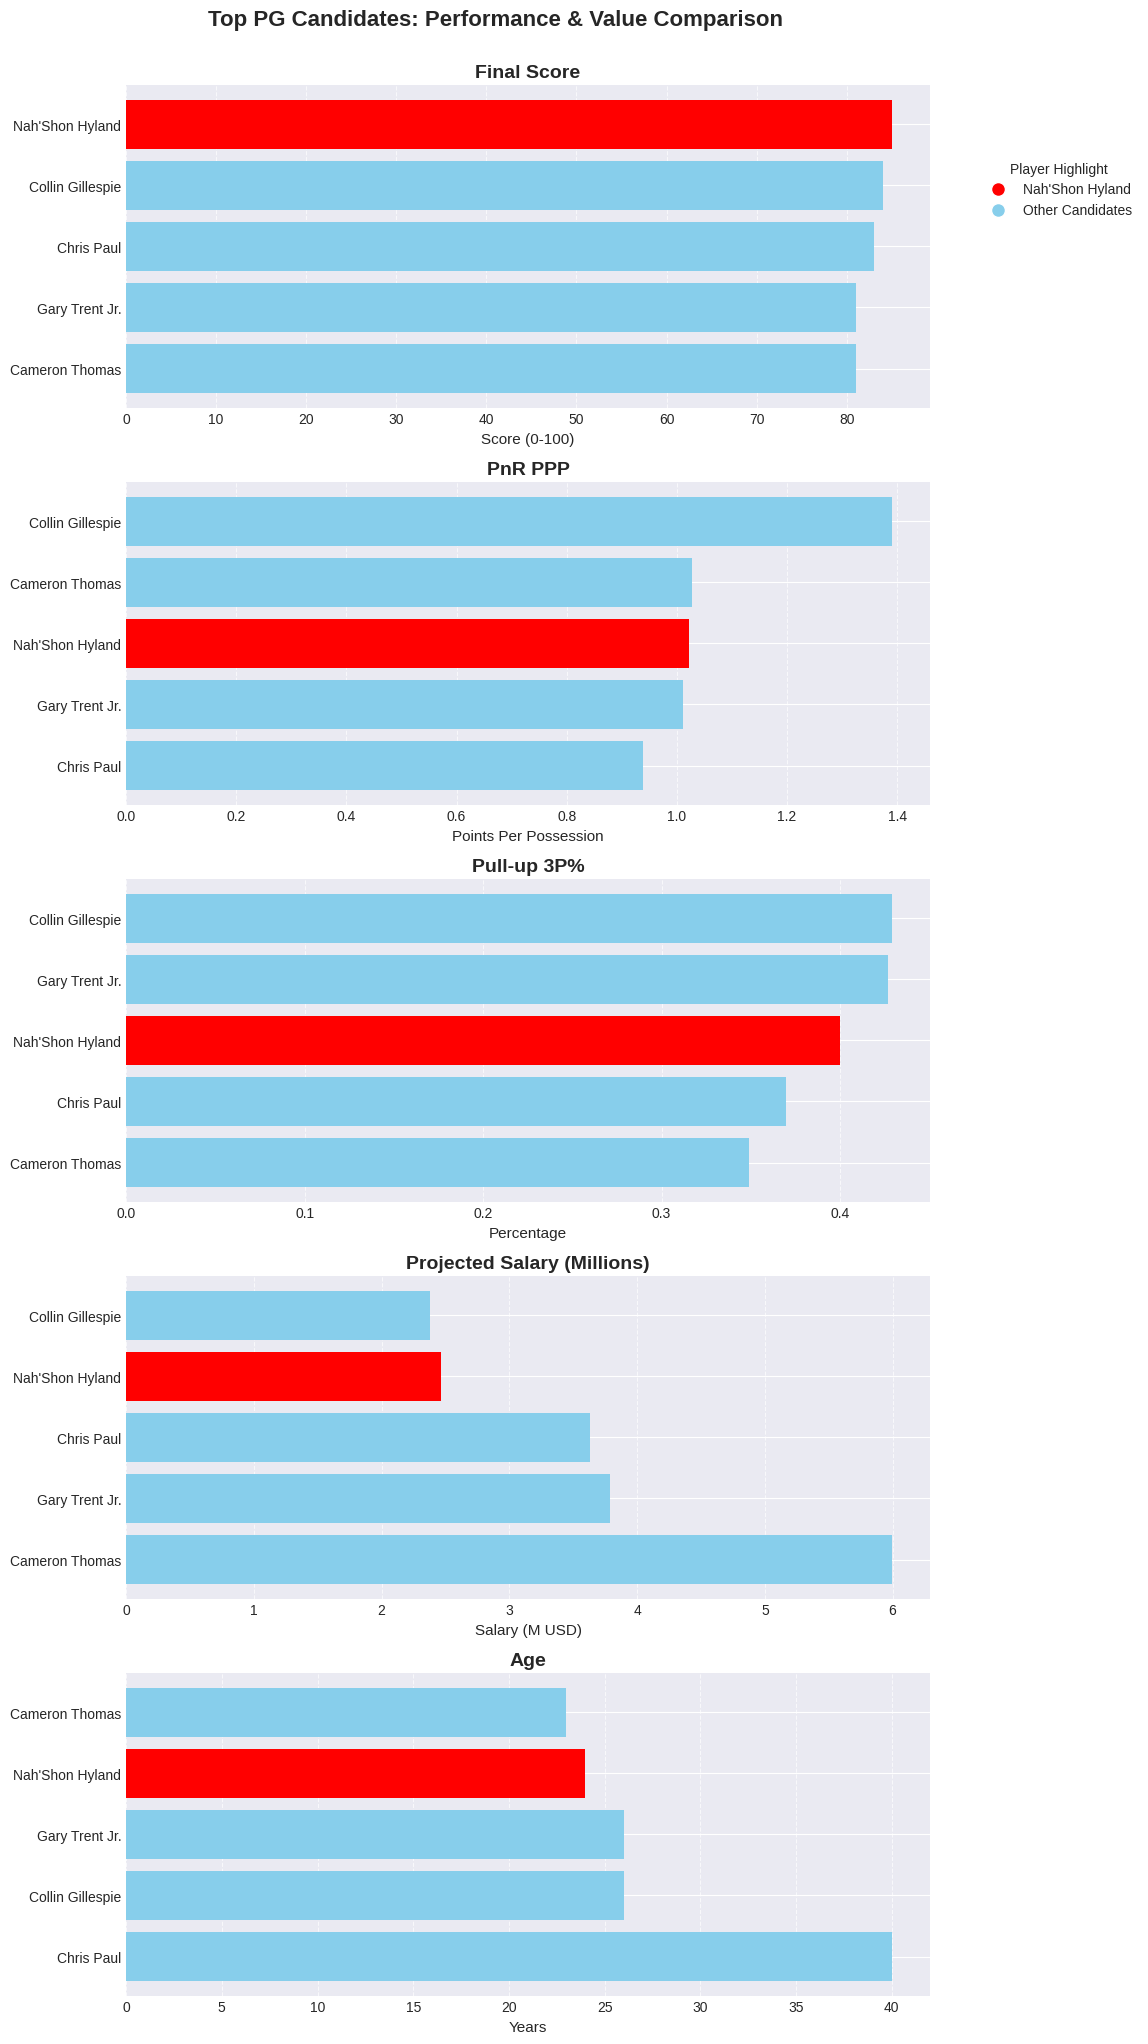

In [ ]:
fig, axes = plt.subplots(5, 1, figsize=(10, 20), sharex=False)

metrics_to_plot = {
    'Final Score': {'column': 'final_score', 'ascending': False, 'ylabel': 'Score (0-100)'},
    'PnR PPP': {'column': 'pnr_ppp', 'ascending': False, 'ylabel': 'Points Per Possession'},
    'Pull-up 3P%': {'column': 'pullup_3p_pct', 'ascending': False, 'ylabel': 'Percentage'},
    'Projected Salary (Millions)': {'column': 'projected_salary_M', 'ascending': True, 'ylabel': 'Salary (M USD)'},
    'Age': {'column': 'age', 'ascending': True, 'ylabel': 'Years'}
}

hyland_color = 'red'
other_color = 'skyblue'

for i, (title, params) in enumerate(metrics_to_plot.items()):
    col = params['column']
    ascending = params['ascending']
    ylabel = params['ylabel']

    # Sort candidates for each metric for better readability within the subplot
    sorted_candidates = candidates_for_viz.sort_values(by=col, ascending=ascending)

    # Assign colors
    colors = [hyland_color if name == "Nah'Shon Hyland" else other_color for name in sorted_candidates['player_name']]

    axes[i].barh(sorted_candidates['player_name'], sorted_candidates[col], color=colors)
    axes[i].set_title(title, fontsize=14, fontweight='bold')
    axes[i].set_xlabel(ylabel, fontsize=11)
    axes[i].tick_params(axis='y', labelsize=10)
    axes[i].invert_yaxis() # To show highest/lowest at the top depending on 'ascending'
    axes[i].grid(axis='x', linestyle='--', alpha=0.7)

# Create a custom legend outside the subplots
hyland_patch = plt.Line2D([0], [0], marker='o', color='w', label="Nah'Shon Hyland",
                          markerfacecolor=hyland_color, markersize=10)
other_patch = plt.Line2D([0], [0], marker='o', color='w', label='Other Candidates',
                         markerfacecolor=other_color, markersize=10)

fig.legend(handles=[hyland_patch, other_patch], loc='upper right', bbox_to_anchor=(1.15, 0.95), title="Player Highlight")

plt.tight_layout(rect=[0, 0, 0.95, 1]) # Adjust layout to make space for the legend
plt.suptitle("Top PG Candidates: Performance & Value Comparison", y=1.02, fontsize=16, fontweight='bold')
plt.show()